In [1]:
from freepaths.scatterers import SinusWave
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import numpy

In [2]:
x0 = 1000e-9
y0 = 0
le = 400e-9
gap = 50e-9
dev = 25e-9
thickness = 75e-9

hole = SinusWave(x0=x0, len=le, gap=gap, deviation=dev, y0=y0, thickness=thickness)
hole.bounds

(1.0625e-06, 1.3874999999999998e-06)

In [3]:
def scattering_on_sinus_wave(ph, box, sin_function, tolerance, bounds, thickness, scattering_types, bottom_points, top_points, xp, yp, zp):
    
    closest_distance = -1
    eval_bounds = None

    # first fast selection
    if box[0] < xp and xp < box[1] and box[2] < yp and yp < box[3]:
        # possibly inside the wave

        # check if the point is within one of the circles
        leftmost_point = sin_function(bounds[0])
        distance = numpy.linalg.norm(numpy.array(leftmost_point) - numpy.array([xp, yp]))
        if distance < thickness/2:
            closest_distance = distance
            closest_point = leftmost_point
            eval_bounds = (bounds[0], bounds[0]+thickness/2)
        
        rightmost_point = sin_function(bounds[1])
        distance = numpy.linalg.norm(numpy.array(rightmost_point) - numpy.array([xp, yp]))
        if distance < thickness/2:
            closest_distance = distance
            closest_point = rightmost_point
            eval_bounds = (bounds[1]-thickness/2, bounds[1])

        # if the point is within one of the circles check if it is not closer to the function close to the circle
        if eval_bounds is not None:
            eval_points = list(numpy.linspace(eval_bounds[0], eval_bounds[1], int(numpy.ceil((thickness/2)/tolerance))))[1:]
            function_values = [sin_function(i)[1] for i in eval_points]
            distances = [numpy.linalg.norm(numpy.array([xp, yp]) - numpy.array([i, u])) for i, u in zip(eval_points, function_values)]
            distance = min(distances)
            if distance < closest_distance:
                closest_distance = distance
                closest_index = numpy.where(distances == distance)[0]
                closest_point = (eval_points[closest_index[0]], function_values[closest_index[0]])

        # if the point was not in the circles do a fast check if the point is close to the function
        else:
            # find top and bottom limit
            top_index = numpy.argmin(numpy.abs(top_points[0] - xp))
            top_y = top_points[1,top_index]
            bottom_index = numpy.argmin(numpy.abs(bottom_points[0] - xp))
            bottom_y = bottom_points[1,bottom_index]
            print(top_y, bottom_y, yp)
            print(bottom_y < yp,yp < top_y)
            if bottom_y < yp and yp < top_y:
                print('detected in range')
                # point inside the slit
                
                # calculate distance from line
                eval_points = list(numpy.linspace(bounds[0], bounds[1], int(numpy.ceil((bounds[1]-bounds[0])/tolerance))))
                function_values = [sin_function(i)[1] for i in eval_points]
                distances = [numpy.linalg.norm(numpy.array([xp, yp]) - numpy.array([i, u])) for i, u in zip(eval_points, function_values)]
                distance = min(distances)
                
                closest_distance = distance
                closest_index = numpy.where(distances == distance)[0]
                closest_point = (eval_points[closest_index[0]], function_values[closest_index[0]])

    if closest_distance != -1:
        return closest_point
    else:
        return (xp, yp)

4.84174738465741e-08 -2.774099987799426e-08 4.5e-08
True True
detected in range
(1.1060670261941447e-06, 1.137874337422983e-08)


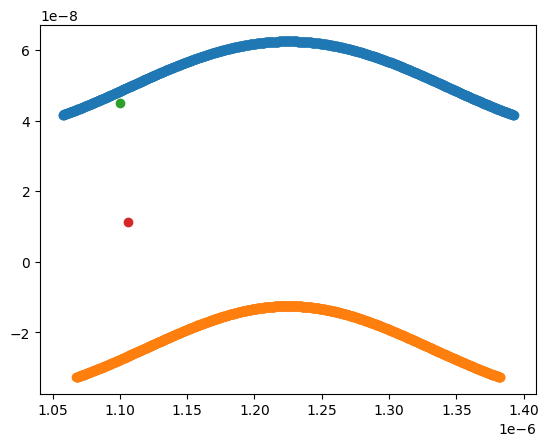

In [4]:
res = scattering_on_sinus_wave(1, hole.box, hole.sin_function, hole.tolerance, hole.bounds, hole.thickness, 1, hole.bottom_points, hole.top_points, 1100e-9, 45e-9, 1)
plt.scatter(hole.top_points[0], hole.top_points[1])
plt.scatter(hole.bottom_points[0], hole.bottom_points[1])
plt.scatter(1100e-9, 45e-9)
print(res)
plt.scatter(res[0], res[1])

In [ ]:
# x0 = 1000
# y0 = 0
# le = 400
# gap = 50
# dev = 100
# thickness = 75

# hole = SinusWave(x0=x0, len=le, gap=gap, deviation=dev, y0=y0, thickness=thickness)
# hole.bounds

In [ ]:
fun_derivative = lambda x: np.array([x*0+1, 2*np.pi*np.sin((x-x0)*2*np.pi/(le+gap))/(le+gap)/2*dev])

In [ ]:
x1 = np.linspace(hole.bounds[0], hole.bounds[1], 100)
y1 = hole.sin_function(x1)
plt.plot(y1[0], y1[1])
plt.show()
y2 = fun_derivative(x1)
plt.plot(x1, y2[1])

In [ ]:
def scattering_on_sinus_wave(ph, box, sin_function, tolerance, bounds, thickness, scattering_types, bottom_points, top_points, xp, yp, zp):
    
    closest_distance = -1
    eval_bounds = None

    # first fast selection
    if box[0] < xp and xp < box[1] and box[2] < yp and yp < box[3]:
        # possibly inside the wave

        # check if the point is within one of the circles
        leftmost_point = sin_function(bounds[0])
        distance = np.linalg.norm(np.array(leftmost_point) - np.array([xp, yp]))
        if distance < thickness/2:
            print('inside left circle')
            closest_distance = distance
            closest_point = leftmost_point
            eval_bounds = (bounds[0], bounds[0]+thickness/2)
        
        rightmost_point = sin_function(bounds[1])
        distance = np.linalg.norm(np.array(rightmost_point) - np.array([xp, yp]))
        if distance < thickness/2:
            print('inside right circle')
            closest_distance = distance
            closest_point = rightmost_point
            eval_bounds = (bounds[1]-thickness/2, bounds[1])

        # if the point is within one of the circles check if it is not closer to the function close to the circle
        if eval_bounds is not None:
            eval_points = list(np.linspace(eval_bounds[0], eval_bounds[1], int(np.ceil((thickness/2)/tolerance))))[1:]
            function_values = [sin_function(i)[1] for i in eval_points]
            distances = [np.linalg.norm(np.array([xp, yp]) - np.array([i, u])) for i, u in zip(eval_points, function_values)]
            distance = min(distances)
            if distance < closest_distance:
                print('acually closer to function')
                closest_distance = distance
                closest_index = np.where(distances == distance)[0]
                closest_point = (eval_points[closest_index[0]], function_values[closest_index[0]])

        # if the point was not in the circles do a fast check if the point is close to the function
        else:
            print('not found in circles')
            # find top and bottom limit
            top_index = np.argmin(np.abs(top_points[0] - xp))
            top_y = top_points[1,top_index]
            bottom_index = np.argmin(np.abs(bottom_points[0] - xp))
            bottom_y = bottom_points[1,bottom_index]

            if bottom_y < yp and yp < top_y:
                print('detected in range')
                # point inside the slit
                
                # calculate distance from line
                eval_points = list(np.linspace(bounds[0], bounds[1], int(np.ceil((bounds[1]-bounds[0])/tolerance))))
                function_values = [sin_function(i)[1] for i in eval_points]
                distances = [np.linalg.norm(np.array([xp, yp]) - np.array([i, u])) for i, u in zip(eval_points, function_values)]
                distance = min(distances)
                
                closest_distance = distance
                closest_index = np.where(distances == distance)[0]
                closest_point = (eval_points[closest_index[0]], function_values[closest_index[0]])

    if closest_distance != -1:
        return distance, closest_point
    
    else:
        return -1, (0,0)

In [ ]:
# x_point = 1270

# point = hole.sin_function(x_point)
# plt.scatter(point[0], point[1])

# plt.plot(y1[0], y1[1])

# yd = fun_derivative(x_point)
# print(yd)
# vector_x_len = 100
# plt.scatter(point[0]+vector_x_len, point[1]+vector_x_len*yd[1])

xs_to_evaluate = np.linspace(hole.bounds[0], hole.bounds[1], 50)
function_value = hole.sin_function(xs_to_evaluate)
derivative_value = fun_derivative(xs_to_evaluate)

switched_axis = derivative_value[[1,0]]
switched_axis[0] = switched_axis[0]*-1

vector_len = 10
tan_vector = np.zeros(derivative_value.shape)
tan_vector[0].fill(vector_len)
tan_vector[1] = derivative_value[1]*vector_len
plot_tan_vector = tan_vector + function_value

plt.scatter(function_value[0], function_value[1])
# plt.scatter(plot_tan_vector[0], plot_tan_vector[1])

orth_vector = tan_vector[[1,0]]
orth_vector[0] = orth_vector[0]*-1
orth_vector = orth_vector/np.linalg.norm(orth_vector, axis=0)*thickness/2
plot_orth_vector = orth_vector + function_value

plt.scatter(plot_orth_vector[0], plot_orth_vector[1]) # top

plot_orth_vector2 = function_value - orth_vector

plt.scatter(plot_orth_vector2[0], plot_orth_vector2[1]) # bottom

plt.gca().add_patch(Circle(hole.sin_function(hole.bounds[0]), thickness/2, fill=False))
plt.gca().add_patch(Circle(hole.sin_function(hole.bounds[1]), thickness/2, fill=False))


POINT = (1100e-9, 48e-9)
plt.scatter(POINT[0], POINT[1])
# def scattering_on_sinus_wave(ph, box, sin_function, tolerance, bounds, thickness, scattering_types, bottom_points, top_points, xp, yp, zp):

distance, closest_p = scattering_on_sinus_wave(1, hole.box, hole.sin_function, hole.tolerance, hole.bounds, hole.thickness, 1, plot_orth_vector2, plot_orth_vector, POINT[0], POINT[1], 1)
print(distance, closest_p)

if closest_p != (0,0):
    plt.scatter(closest_p[0], closest_p[1])

plt.axis('scaled')

In [ ]:
xs_to_evaluate = np.linspace(hole.bounds[0], hole.bounds[1], 50)
function_value = hole.sin_function(xs_to_evaluate)
derivative_value = fun_derivative(xs_to_evaluate)

switched_axis = derivative_value[[1,0]]
switched_axis[0] = switched_axis[0]*-1

vector_len = 10
tan_vector = np.zeros(derivative_value.shape)
tan_vector[0].fill(vector_len)
tan_vector[1] = derivative_value[1]*vector_len
plot_tan_vector = tan_vector + function_value

plt.scatter(function_value[0], function_value[1])

plt.scatter(hole.top_points[0], hole.top_points[1])
plt.scatter(hole.bottom_points[0], hole.bottom_points[1])

plt.axis('scaled')

In [ ]:
import numpy